# データサイエンス 第9回
## データ分析（相関分析・Bland-Altman分析）

In [ ]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
# !pip install geopandas numpy matplotlib pandas pyserial requests japanize-matplotlib setuptools scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import japanize_matplotlib 
import scipy.stats as stats

%matplotlib inline 

### 相関分析

In [3]:
def plot_scatter(X, Y, line=False, hatching=False, fill=0):
    mean_X = sum(X) / len(X)
    mean_Y = sum(Y) / len(Y)

    plt.figure(figsize=(5, 5))

    # 表示範囲（塗りつぶしにも使う）
    xmin, xmax = -1.5, 1.5
    ymin, ymax = -1.5, 1.5

    x_mid, y_mid = mean_X, mean_Y

    # 象限塗りつぶし（表示範囲に合わせる）
    if fill == 1:
        plt.fill_betweenx([y_mid, ymax], x_mid, xmax, alpha=0.30, color='lightblue')
    elif fill == 2:
        plt.fill_betweenx([y_mid, ymax], xmin, x_mid, alpha=0.10, color='red')
    elif fill == 3:
        plt.fill_betweenx([ymin, y_mid], xmin, x_mid, alpha=0.30, color='lightblue')
    elif fill == 4:
        plt.fill_betweenx([ymin, y_mid], x_mid, xmax, alpha=0.10, color='red')

    # 散布図
    plt.scatter(X, Y, c='k')

    # 平均ライン
    if line:
        plt.axvline(mean_X, color='k', linestyle='--', label=f'Xの平均値: {mean_X:.2f}')
        plt.axhline(mean_Y, color='k', linestyle='--', label=f'Yの平均値: {mean_Y:.2f}')
        plt.legend()

    # ハッチング風の長方形（pltではなくaxにadd_patchする）
    if hatching:
        ax = plt.gca()
        for x, y in zip(X, Y):
            width  = abs(x - mean_X)
            height = abs(y - mean_Y)
            color = 'blue' if (x > mean_X and y > mean_Y) or (x < mean_X and y < mean_Y) else 'red'
            rect = Rectangle(
                (min(x, mean_X), min(y, mean_Y)),
                width, height,
                facecolor=color, edgecolor='none', alpha=0.05
            )
            ax.add_patch(rect)

    # 体裁
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$x$', fontsize=16, math_fontfamily='cm')
    plt.ylabel(r'$y$', fontsize=16, math_fontfamily='cm')
    plt.tick_params(labelsize=12)
    plt.tight_layout()


相関係数：0.9959


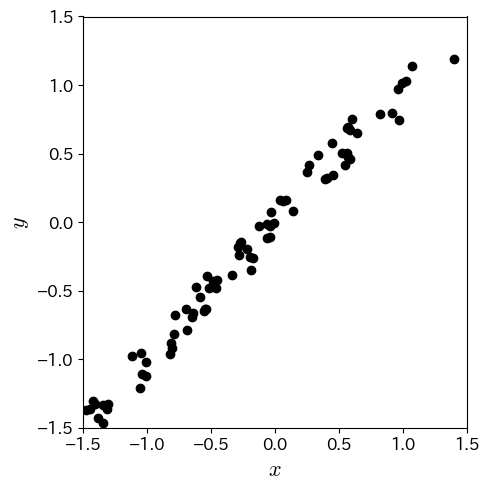

In [4]:
X = np.random.normal(0, 1, 100)
Y = X + np.random.normal(0, 1, 100) * 0.1
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y)

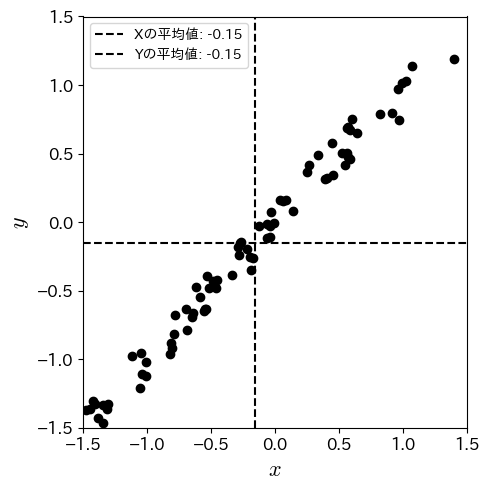

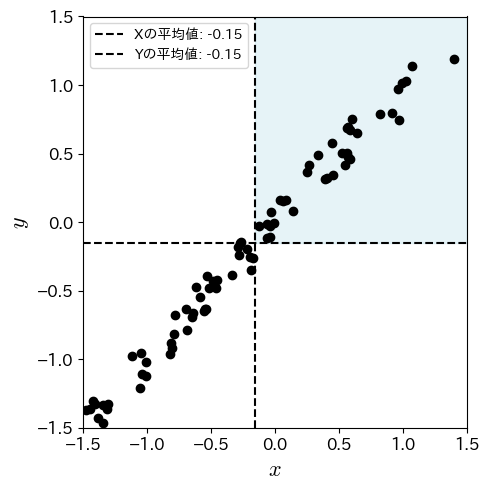

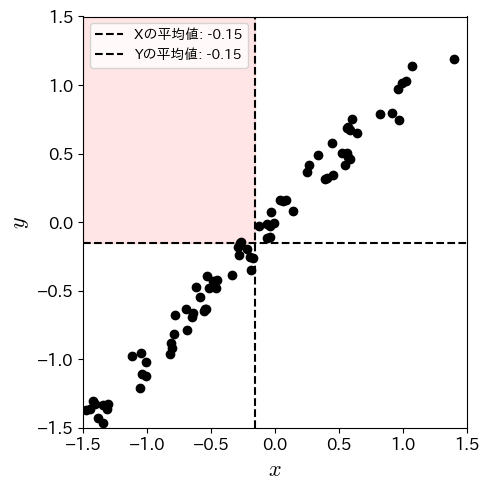

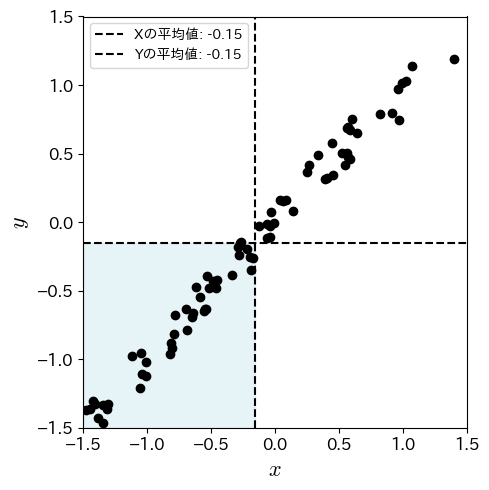

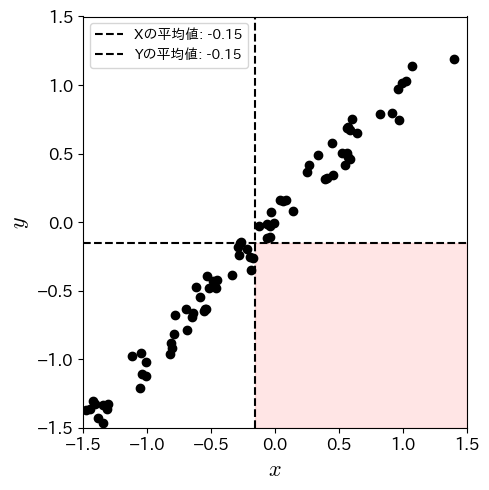

In [5]:
for i in range(5):
    plot_scatter(X, Y, line=True,fill=i)

相関係数：0.9956


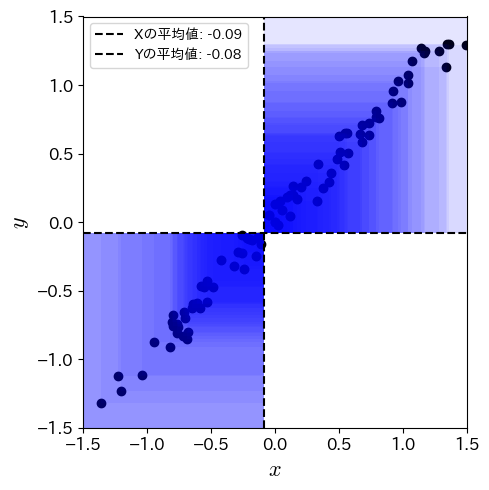

In [6]:
X = np.random.normal(0, 1, 100)
Y = X + np.random.normal(0, 1, 100) * 0.1
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y, line=True, hatching=True)

相関係数：0.7150


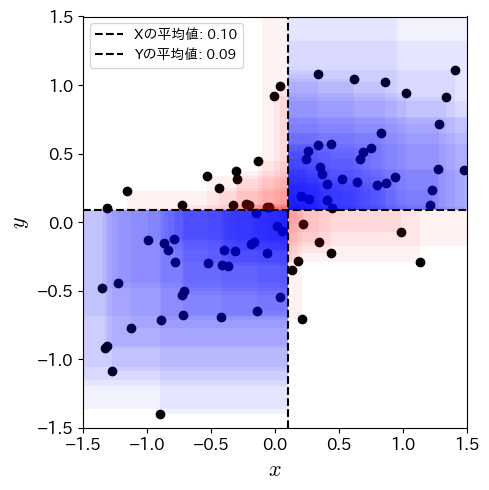

In [7]:
X = np.random.normal(0, 1, 100)
Y = 0.5 * X + np.random.normal(0, 1, 100) * 0.5
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y, line=True, hatching=True)

相関係数：-0.6806


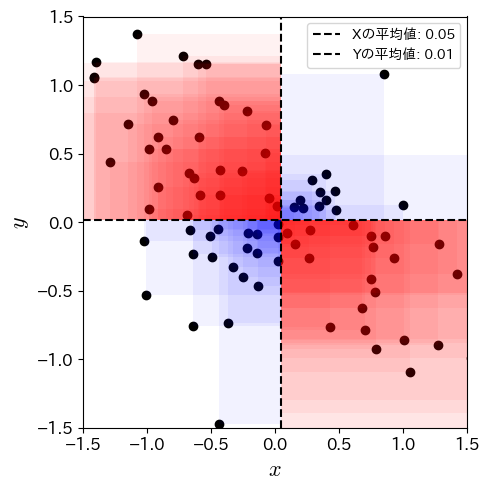

In [8]:
X = np.random.normal(0, 1, 100)
Y = -0.5 * X + np.random.normal(0, 1, 100) * 0.5
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y, line=True, hatching=True)

相関係数：-0.9950


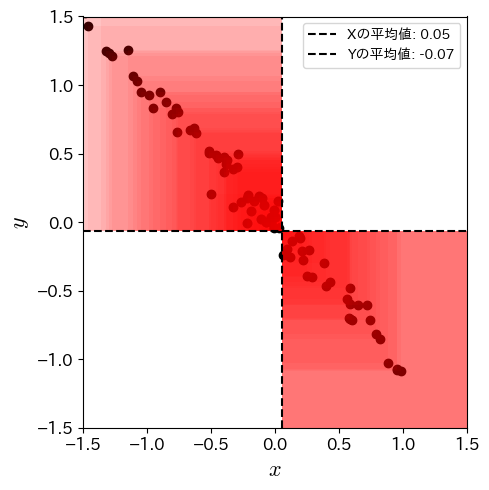

In [9]:
X = np.random.normal(0, 1, 100)
Y = -X + np.random.normal(0, 1, 100) * 0.1
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y, line=True, hatching=True)

相関係数：-0.0126


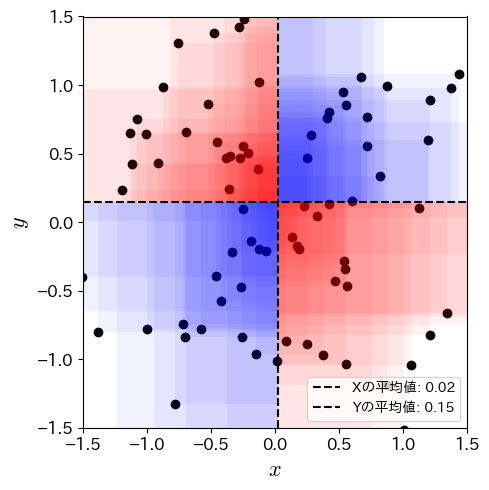

In [10]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
correlation = np.corrcoef(X, Y)[0, 1]

print(f"相関係数：{correlation:.4f}")

plot_scatter(X, Y, line=True, hatching=True)

<span style="font-size: 20px; color: #F08000;">例題1　相関係数の計算</span>

以下の表の学生の数学とプログラミングの成績データから、２つの成績に関する相関係数を求めよ

| No. | 数学 | プログラミング | 
| --- | ---- | ---- | 
| 1   | 57   | 64   | 
| 2   | 71   | 73   | 
| 3   | 87   | 76   | 
| 4   | 88   | 84   | 
| 5   | 83   | 93   | 
| 6   | 89   | 80   | 
| 7   | 81   | 88   | 
| 8   | 93   | 94   | 
| 9   | 76   | 73   | 
| 10  | 79   | 75   | 
| 11  | 89   | 76   | 
| 12  | 91   | 91   | 


相関係数（numpyで計算）: 0.711


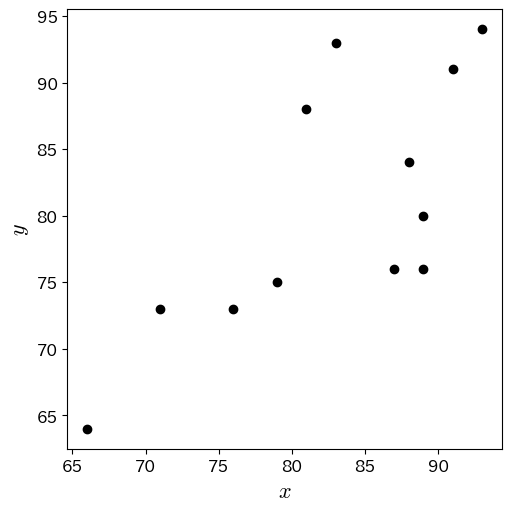

In [11]:
x = [66, 71, 87, 88, 83, 89, 81, 93, 76, 79, 89, 91]
y = [64, 73, 76, 84, 93, 80, 88, 94, 73, 75, 76, 91]

print("相関係数（numpyで計算）:", round(np.corrcoef(x, y)[0,1], 3))

plt.figure(figsize=(5, 5), layout='constrained')

plt.scatter(x, y, color='k')
plt.xlabel(r'$x$', fontsize=16, math_fontfamily='cm')
plt.ylabel(r'$y$', fontsize=16, math_fontfamily='cm')
plt.tick_params(labelsize=12)

<span style="font-size: 20px; color: #F08000;">問題1　相関係数の計算</span>

1. 以下の表から，身長と体重に関する相関係数を求めよ
2. `Numpy` の `np.corrcoef` 関数を用いて相関係数を求めよ
3. `np.corrcoef` 関数を使わずに相関係数を求めるプログラムを作成せよ

| No. | 身長 (cm) | 体重 (kg) |
|-----|-----------|-----------|
| 1   | 160       | 55        |
| 2   | 172       | 68        |
| 3   | 158       | 50        |
| 4   | 180       | 75        |
| 5   | 165       | 60        |
| 6   | 170       | 65        |
| 7   | 176       | 70        |


In [12]:
##############################
# 問題1のコードを記入

##############################

### 共分散と相関係数

共分散: 60.7959
相関係数: 0.9916
共分散: 52.7685
相関係数: 0.9916


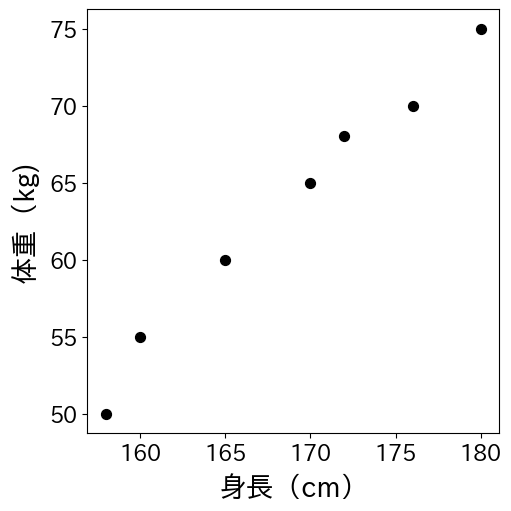

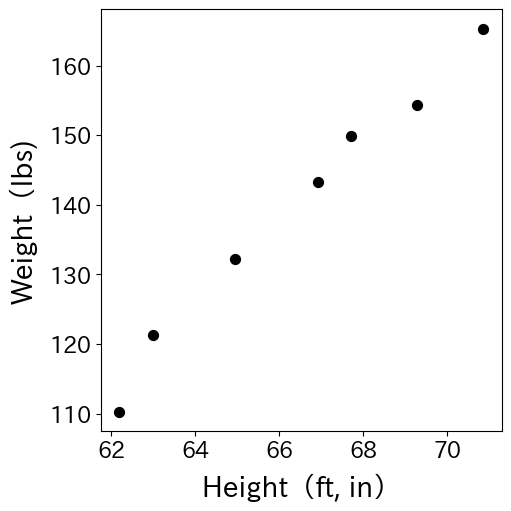

In [13]:
# データセット
heights_cm = [160, 172, 158, 180, 165, 170, 176]  # 身長 (cm)
weights_kg = [55, 68, 50, 75, 60, 65, 70]         # 体重 (kg)

# 単位変換
weights_lbs = [w * 2.20462 for w in weights_kg]  # kg -> lbs
heights_inches = [h / 2.54 for h in heights_cm]  # cm -> inches

# フィート・インチ形式に変換する関数
def to_feet_inches(height_in_inches):
    feet = int(height_in_inches // 12)
    inches = height_in_inches % 12
    return f"{feet}'{int(inches)}\""

y_labels = [to_feet_inches(h) for h in heights_inches]

# 共分散を計算
cov_matrix_jp = np.cov(heights_cm, weights_kg, bias=True)
covariance_jp = cov_matrix_jp[0, 1]

# 相関係数を計算
correlation_jp = np.corrcoef(heights_cm, weights_kg)[0, 1]

## 共分散を計算
cov_matrix_us = np.cov(heights_inches, weights_lbs, bias=True)
covariance_us = cov_matrix_us[0, 1]

# 相関係数を計算
correlation_us = np.corrcoef(heights_inches, weights_lbs)[0, 1]

print(f"共分散: {covariance_jp:.4f}")
print(f"相関係数: {correlation_jp:.4f}")
print(f"共分散: {covariance_us:.4f}")
print(f"相関係数: {correlation_us:.4f}")


plt.figure(figsize=(5, 5), layout='constrained')
plt.scatter(heights_cm, weights_kg, c="black", s=50)
plt.xlabel("身長（cm）", fontsize=20, labelpad=8)
plt.ylabel("体重（kg)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.figure(figsize=(5, 5), layout='constrained')
plt.scatter(heights_inches, weights_lbs, c="black", s=50)
plt.xlabel("Height（ft, in）", fontsize=20, labelpad=8)
plt.ylabel("Weight（lbs)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

相関係数（全データ）: 0.881
相関係数（#17を除外）: 0.685


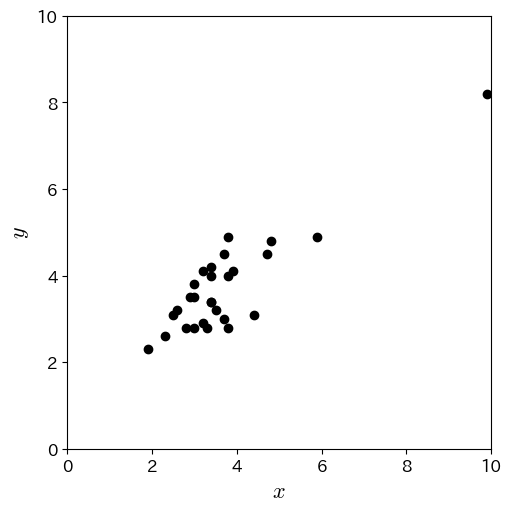

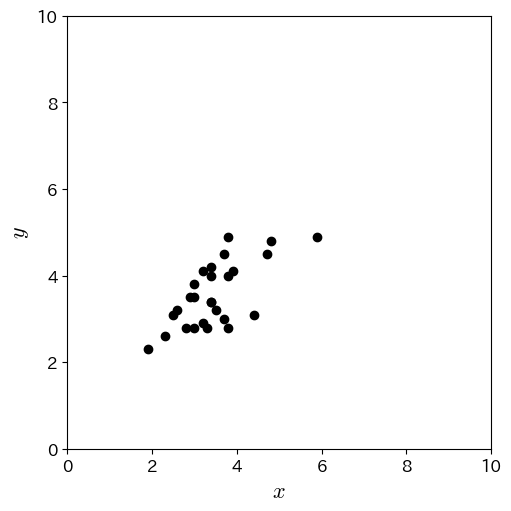

In [14]:
x1 = [3.4, 1.9, 3.0, 3.4, 3.0, 3.7, 3.0, 2.8, 2.5, 3.8, 3.2, 4.8, 2.6, 2.9, 3.8, 5.9, 9.9, 3.7, 3.2, 3.4, 3.9, 2.3, 3.4, 4.4, 3.5, 3.8, 3.3, 4.7]
y1 = [4.2, 2.3, 2.8, 3.4, 3.8, 4.5, 3.5, 2.8, 3.1, 4.9, 4.1, 4.8, 3.2, 3.5, 2.8, 4.9, 8.2, 3.0, 2.9, 3.4, 4.1, 2.6, 4.0, 3.1, 3.2, 4.0, 2.8, 4.5]

x2 = [3.4, 1.9, 3.0, 3.4, 3.0, 3.7, 3.0, 2.8, 2.5, 3.8, 3.2, 4.8, 2.6, 2.9, 3.8, 5.9,      3.7, 3.2, 3.4, 3.9, 2.3, 3.4, 4.4, 3.5, 3.8, 3.3, 4.7]
y2 = [4.2, 2.3, 2.8, 3.4, 3.8, 4.5, 3.5, 2.8, 3.1, 4.9, 4.1, 4.8, 3.2, 3.5, 2.8, 4.9,      3.0, 2.9, 3.4, 4.1, 2.6, 4.0, 3.1, 3.2, 4.0, 2.8, 4.5]

plt.figure(figsize=(5, 5), layout='constrained')
plt.scatter(x1, y1, color='k')  # 散布図の描画
plt.xlabel(r'$x$', fontsize=16, math_fontfamily='cm')
plt.ylabel(r'$y$', fontsize=16, math_fontfamily='cm')
plt.tick_params(labelsize=12)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.figure(figsize=(5, 5), layout='constrained')
plt.scatter(x2, y2, color='k')  # 散布図の描画
plt.xlabel(r'$x$', fontsize=16, math_fontfamily='cm')
plt.ylabel(r'$y$', fontsize=16, math_fontfamily='cm')
plt.tick_params(labelsize=12)
plt.xlim(0, 10)
plt.ylim(0, 10)

print("相関係数（全データ）:", round(np.corrcoef(x1, y1)[0,1], 3))
print("相関係数（#17を除外）:", round(np.corrcoef(x2, y2)[0,1], 3))

### Bland-Altman 分析

<span style="font-size: 20px; color: #F08000;">例題2　Bland-Altman 分析</span>

ある学生は学生で脈拍計を開発した

その性能を評価するため，信頼できる市販の脈拍計と開発した脈拍計を使って同時に同一被験者の脈拍を測定したところ，以下のような結果を得た

市販の脈拍計と開発した脈拍計で取得された脈拍の差は正規分布すると仮定した上でBland-Altman分析を行え

1. 平均差 (バイアス)，上限値，下限値を求めよ
2. Bland-Altrman プロットを描画せよ
</div>
<div style="width: 30%; margin: 0 auto; justify-content: center;">

| No.  | 市販の脈拍計[bpm] | 開発した脈拍計[bpm] | 
| ---- | ---- | ---- | 
| #1   | 66   | 64   | 
| #2   | 71   | 73   | 
| #3   | 87   | 76   | 
| #4   | 88   | 84   | 
| #5   | 83   | 93   | 
| #6   | 89   | 80   | 
| #7   | 81   | 88   | 
| #8   | 93   | 94   | 
| #9   | 76   | 73   | 
| #10  | 79   | 75   | 
| #11  | 89   | 76   | 
| #12  | 91   | 91   | 
| #13   | 68   | 65   | 
| #14   | 72   | 73   | 
| #15   | 81   | 75   | 
| #16   | 63   | 68   | 
| #17   | 73   | 73   | 
| #18   | 89   | 81   | 
| #19   | 83   | 89   | 
| #20   | 92   | 95   | 

=== Bland-Altman Analysis ===
平均差 (バイアス): 1.40 bpm
上限値 (+1.96 SD): 13.08 bpm
下限値 (-1.96 SD): -10.28 bpm


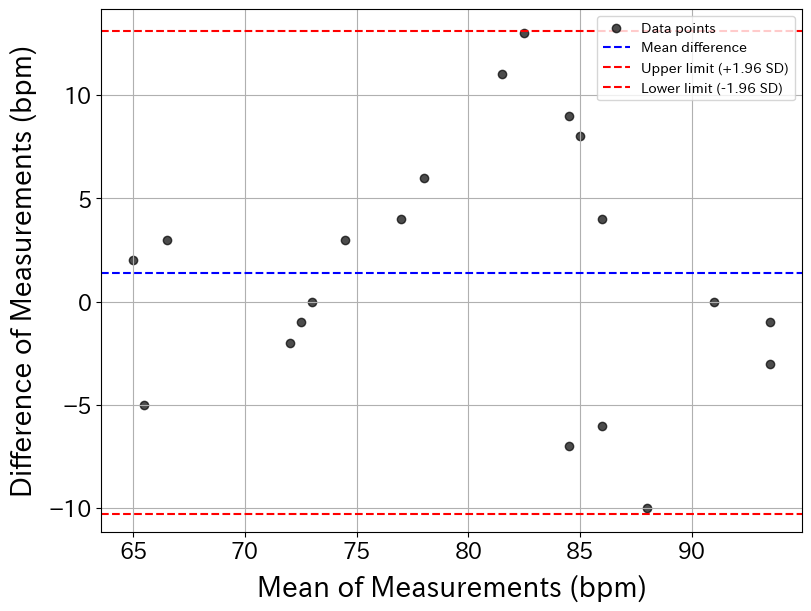

In [15]:
# データ
commercial = np.array([66, 71, 87, 88, 83, 89, 81, 93, 76, 79, 89, 91, 68, 72, 81, 63, 73, 89, 83, 92])  # 市販の脈拍計
developed = np.array([64, 73, 76, 84, 93, 80, 88, 94, 73, 75, 76, 91, 65, 73, 75, 68, 73, 81, 89, 95])  # 開発した脈拍計

mean_values = (commercial + developed) / 2  # 平均値
differences = commercial - developed        # 差分
mean_diff = np.mean(differences)            # 差分の平均
std_diff = np.std(differences)              # 差分の標準偏差

upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

plt.figure(figsize=(8, 6), layout='constrained')
plt.scatter(mean_values, differences, color='k', alpha=0.7, label='Data points')
plt.axhline(mean_diff, color='blue', linestyle='--', label='Mean difference')
plt.axhline(upper_limit, color='red', linestyle='--', label='Upper limit (+1.96 SD)')
plt.axhline(lower_limit, color='red', linestyle='--', label='Lower limit (-1.96 SD)')

plt.xlabel('Mean of Measurements (bpm)', fontsize=20, labelpad=8)
plt.ylabel('Difference of Measurements (bpm)', fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)
plt.legend()
plt.grid(True)

print("=== Bland-Altman Analysis ===")
print(f"平均差 (バイアス): {mean_diff:.2f} bpm")
print(f"上限値 (+1.96 SD): {upper_limit:.2f} bpm")
print(f"下限値 (-1.96 SD): {lower_limit:.2f} bpm")

<span style="font-size: 20px; color: #F08000;">問題2　Bland-Altman 分析</span>

manabaからサンプル実験データファイル（`lecrure9.csv`）をダウンロードせよ

このファイルには，同一被験者について信頼できる市販の脈拍計と開発した脈拍計を使って同時に取得した脈拍の模擬データが記載されている

市販の脈拍計と開発した脈拍計で取得された脈拍の差は正規分布すると仮定した上でBland-Altman分析を行え

1. 平均差，上限値，下限値を求めよ
2. Bland-Altrman プロットを描画せよ


In [16]:
##############################
# 問題2のコードを記入

##############################